In [1]:
## Automating Credit Card Approval Decisions: A Comparative Analysis of Machine Learning Models

Author 
* Aaron Singh 
* Will Watson
* Mila Avagimova

In [6]:
# Import pandas
import pandas as pd

# Load dataset
cc_apps = pd.read_csv("datasets/cc_approvals.data", header=None)

# Inspect data
cc_apps.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [7]:
# Print summary statistics
cc_apps_description = cc_apps.describe()
print(cc_apps_description)

print('\n')

# Print DataFrame information
cc_apps_info = cc_apps.info()
print(cc_apps_info)

print('\n')

# Inspect missing values in the dataset

               2           7          10             14
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406    2.40000    1017.385507
std      4.978163    3.346513    4.86294    5210.102598
min      0.000000    0.000000    0.00000       0.000000
25%      1.000000    0.165000    0.00000       0.000000
50%      2.750000    1.000000    0.00000       5.000000
75%      7.207500    2.625000    3.00000     395.500000
max     28.000000   28.500000   67.00000  100000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 no

In [8]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Drop the features 11 and 13
cc_apps = cc_apps.drop(cc_apps.columns[[11, 13]], axis = 1)

# Split into train and test sets
cc_apps_train, cc_apps_test = train_test_split(cc_apps, test_size=0.33, random_state=42)
cc_apps

,0,1,2,3,4,5,6,7,8,9,10,12,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,s,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,g,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,g,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,g,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,g,750,-


In [9]:
# Import numpy
import numpy as np

# Replace the '?'s with NaN in the train and test sets
cc_apps_train = cc_apps_train.replace("?","NaN")
cc_apps_test = cc_apps_test.replace("?","NaN")
print(cc_apps_train, "\n\n")
print(cc_apps_train.iloc[:,[2,7,10,12]])

      0      1      2    3    4    5    6       7  8  9   10 12    14 15
382    a  24.33  2.500    y    p    i   bb   4.500  f  f   0  g   456  -
137    b  33.58  2.750    u    g    m    v   4.250  t  t   6  g     0  +
346  NaN  32.25  1.500    u    g    c    v   0.250  f  f   0  g   122  -
326    b  30.17  1.085    y    p    c    v   0.040  f  f   0  g   179  -
33     a  36.75  5.125    u    g    e    v   5.000  t  f   0  g  4000  +
..   ...    ...    ...  ...  ...  ...  ...     ... .. ..  .. ..   ... ..
71     b  34.83  4.000    u    g    d   bb  12.500  t  f   0  g     0  -
106    b  28.75  1.165    u    g    k    v   0.500  t  f   0  s     0  -
270    b  37.58  0.000  NaN  NaN  NaN  NaN   0.000  f  f   0  p     0  +
435    b  19.00  0.000    y    p   ff   ff   0.000  f  t   4  g     1  -
102    b  18.67  5.000    u    g    q    v   0.375  t  t   2  g    38  -

[462 rows x 14 columns] 


        2       7   10    14
382  2.500   4.500   0   456
137  2.750   4.250   6     0
346  1.50

In [10]:
# Impute the missing values with mean imputation
cc_apps_train.iloc[:,[2,7,10,12]].fillna(cc_apps_train.iloc[:,[2,7,10,12]].mean(), inplace=True)
cc_apps_test.iloc[:,[2,7,10,12]].fillna(cc_apps_train.iloc[:,[2,7,10,12]].mean(), inplace=True)

# Count the number of NaNs in the datasets and print the counts to verify
print(cc_apps_train.isna().sum())
print(cc_apps_test.isna().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64


/var/folders/96/6rntsrgn6sq814w8zq_g3srh0000gp/T/ipykernel_26933/4038488243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_apps_train.iloc[:,[2,7,10,12]].fillna(cc_apps_train.iloc[:,[2,7,10,12]].mean(), inplace=True)
/var/folders/96/6rntsrgn6sq814w8zq_g3srh0000gp/T/ipykernel_26933/4038488243.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_apps_test.iloc[:,[2,7,10,12]].fillna(cc_apps_train.iloc[:,[2,7,10,12]].mean(), inplace=True)


In [11]:
# Iterate over each column of cc_apps_train
for col in cc_apps_train.columns:
    # Check if the column is of object type
    if col == 'object':
        # Impute with the most frequent value
        cc_apps_train = cc_apps_train.fillna(cc_apps_train.value_counts())
        cc_apps_test = cc_apps_test.fillna(cc_apps_test.value_counts())

# Count the number of NaNs in the dataset and print the counts to verify
print(cc_apps_train.isna().sum(), "\n\n")
print(cc_apps_test.isna().sum(), "\n\n")
print(cc_apps_train)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64 


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64 


      0      1      2    3    4    5    6       7  8  9   10 12    14 15
382    a  24.33  2.500    y    p    i   bb   4.500  f  f   0  g   456  -
137    b  33.58  2.750    u    g    m    v   4.250  t  t   6  g     0  +
346  NaN  32.25  1.500    u    g    c    v   0.250  f  f   0  g   122  -
326    b  30.17  1.085    y    p    c    v   0.040  f  f   0  g   179  -
33     a  36.75  5.125    u    g    e    v   5.000  t  f   0  g  4000  +
..   ...    ...    ...  ...  ...  ...  ...     ... .. ..  .. ..   ... ..
71     b  34.83  4.000    u    g    d   bb  12.500  t  f   0  g     0  -
106    b  28.75  1.165    u    g    k    v   0.500  t  f   0  s     0  -
270    b  37.58  0.000  NaN  NaN  NaN  NaN   0.000  f  f   0  p     0  +
435    b  19.0

In [12]:
# Convert the categorical features in the train and test sets independently
cc_apps_train = pd.get_dummies(cc_apps_train)
cc_apps_test = pd.get_dummies(cc_apps_test)

# Reindex the columns of the test set aligning with the train set
cc_apps_test = cc_apps_test.reindex(columns=cc_apps_train.columns, fill_value=0)

print(cc_apps_train,"\n\n")
print(cc_apps_test,"\n\n")

         2       7  10    14  0_NaN  0_a  0_b  1_13.75  1_15.83  1_15.92  ...  \
382  2.500   4.500   0   456      0    1    0        0        0        0  ...   
137  2.750   4.250   6     0      0    0    1        0        0        0  ...   
346  1.500   0.250   0   122      1    0    0        0        0        0  ...   
326  1.085   0.040   0   179      0    0    1        0        0        0  ...   
33   5.125   5.000   0  4000      0    1    0        0        0        0  ...   
..     ...     ...  ..   ...    ...  ...  ...      ...      ...      ...  ...   
71   4.000  12.500   0     0      0    0    1        0        0        0  ...   
106  1.165   0.500   0     0      0    0    1        0        0        0  ...   
270  0.000   0.000   0     0      0    0    1        0        0        0  ...   
435  0.000   0.000   4     1      0    0    1        0        0        0  ...   
102  5.000   0.375   2    38      0    0    1        0        0        0  ...   

     6_z  8_f  8_t  9_f  9_

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the rescaled data back to a DataFrame for visualization
rescaled_df_train = pd.DataFrame(rescaledX_train, columns=cc_apps_train.columns[:-1])
rescaled_df_train['Class'] = y_train

# Calculate the number of rows and columns for subplots
num_features = len(rescaled_df_train.columns) - 1
num_cols = 4  # Set the desired number of columns
num_rows = (num_features - 1) // num_cols + 1

# Visualize the distribution of individual features using histograms
plt.figure(figsize=(18, 3 * num_rows))  # Increase figure height
for i, feature in enumerate(rescaled_df_train.columns[:-1]):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(rescaled_df_train[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Visualize pair plots for all features excluding the target column 'Class'
plt.figure(figsize=(12, 8))
sns.pairplot(rescaled_df_train.iloc[:, :-1], hue='Class')
plt.suptitle('Pair Plot of Features', y=1.02)  # Adjust y parameter for title position
plt.show()


In [14]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression 

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train, y_train)

LogisticRegression()

In [15]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test, y_test))

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test,y_pred))

Accuracy of logistic regression classifier:  1.0
[[103   0]
 [  0 125]]


In [16]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol = tol, max_iter = max_iter)

In [17]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Fit grid_model to the data
grid_model_result = grid_model.fit(rescaledX_train, y_train)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

# Extract the best model and evaluate it on the test set
best_model = grid_model_result.best_estimator_
print("Accuracy of logistic regression classifier: " ,best_model.score(rescaledX_test,y_test))

Best: 1.000000 using {'max_iter': 100, 'tol': 0.01}
Accuracy of logistic regression classifier:  1.0


In [18]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


Accuracy of logistic regression classifier (before tuning):  1.0
Confusion Matrix (before tuning):
 [[103   0]
 [  0 125]]
Accuracy of logistic regression classifier (after tuning):  1.0


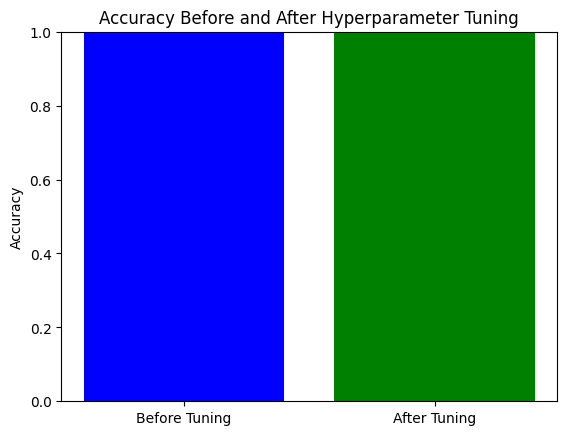

In [21]:
# Import necessary libraries
import matplotlib.pyplot as plt

# ...

# Get the accuracy score of logreg model and print it
accuracy_before_tuning = logreg.score(rescaledX_test, y_test)
print("Accuracy of logistic regression classifier (before tuning): ", accuracy_before_tuning)

# Print the confusion matrix of the logreg model
conf_matrix_before_tuning = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (before tuning):\n", conf_matrix_before_tuning)

# ...

# Fit grid_model to the data
grid_model_result = grid_model.fit(rescaledX_train, y_train)

# ...

# Extract the best model and evaluate it on the test set
best_model = grid_model_result.best_estimator_
accuracy_after_tuning = best_model.score(rescaledX_test, y_test)
print("Accuracy of logistic regression classifier (after tuning): ", accuracy_after_tuning)

# Plotting the accuracy comparison
labels = ['Before Tuning', 'After Tuning']
accuracy_values = [accuracy_before_tuning, accuracy_after_tuning]

plt.bar(labels, accuracy_values, color=['blue', 'green'])
plt.ylim(0, 1)  # Setting y-axis limit to match the accuracy range (0 to 1)
plt.title('Accuracy Before and After Hyperparameter Tuning')
plt.ylabel('Accuracy')
plt.show()


Accuracy of logistic regression classifier (before tuning):  1.0
Confusion Matrix (before tuning):
 [[103   0]
 [  0 125]]


NameError: name 'plot_confusion_matrix' is not defined